# Loan Status Prediction

In [1]:
import pandas as pd

train_df = pd.read_csv('full_dataset.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Loan Status            10000 non-null  object
 1   Credit Score           10000 non-null  object
 2   Ethnicity              10000 non-null  object
 3   Loan Amount            10000 non-null  object
 4   Economic Status        10000 non-null  object
 5   Credit History         10000 non-null  object
 6   Education              10000 non-null  object
 7   Gender                 10000 non-null  object
 8   Discriminatory Factor  10000 non-null  object
 9   Age                    10000 non-null  object
 10  Income                 10000 non-null  object
 11  Living Area            10000 non-null  object
dtypes: object(12)
memory usage: 937.6+ KB


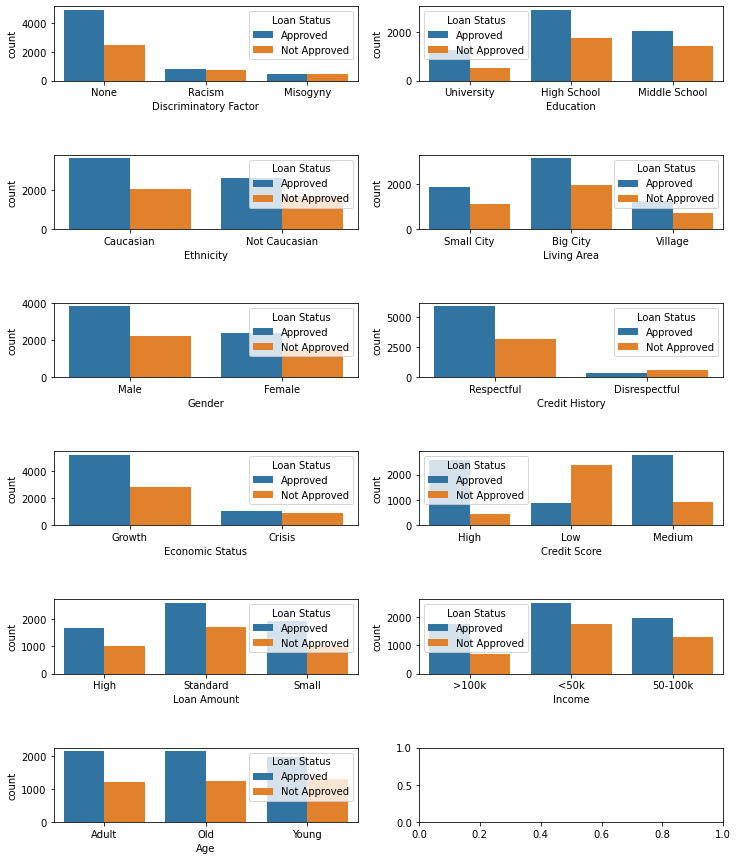

In [2]:
# Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = ['Discriminatory Factor','Education','Ethnicity','Living Area','Gender','Credit History','Economic Status','Credit Score','Loan Amount','Income','Age']
fig,axes = plt.subplots(6,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_df,hue='Loan Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

## Naive Bayes

In [3]:
from sklearn.naive_bayes import CategoricalNB
clf_nb = CategoricalNB()

In [4]:
# Transforming categorical attributes using dummies

train_df_encoded = pd.get_dummies(train_df, drop_first=True)

In [5]:
# Split Features and Target Varible
X = train_df_encoded.drop(columns='Loan Status_Not Approved')
y = train_df_encoded['Loan Status_Not Approved']

# Splitting into Train -Test Data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

In [6]:
clf_nb.fit(X_train,y_train)
y_pred_nb = clf_nb.predict(X_test)

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Confusion matrix")
print(confusion_matrix(y_test, y_pred_nb))

print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Confusion matrix
[[1061  189]
 [ 267  483]]
Accuracy: 0.772


## Decision Tree

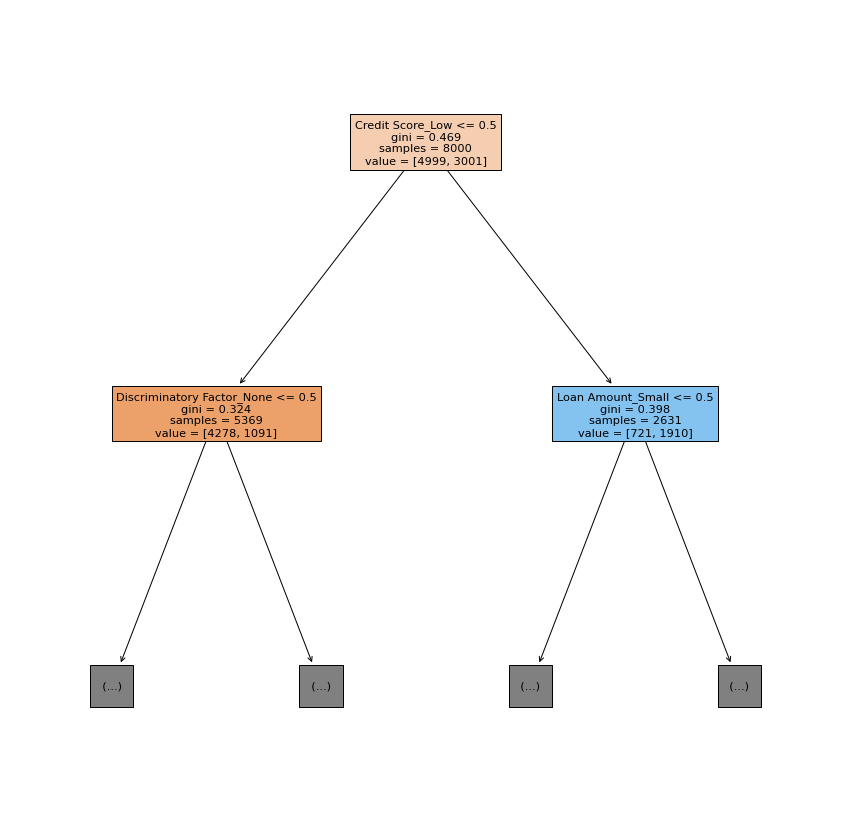

In [8]:
# BUILDING AND VISUALIZING THE TREE
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

clf_dt = DecisionTreeClassifier(min_samples_split=20, random_state=42, max_depth= 5)
clf_dt.fit(X_train, y_train)

features = list(X_train.columns[:19])
plt.figure(figsize=(15,15))
graph = tree.plot_tree(clf_dt,feature_names=features, filled=True, max_depth = 1, )
plt.show(graph)

# ORANGE IS NO BLUE IS YES


In [9]:
y_pred_dt = clf_dt.predict(X_test)

In [10]:
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred_dt))

print("Accuracy:", accuracy_score(y_test, y_pred_dt))

Confusion matrix
[[1067  183]
 [ 236  514]]
Accuracy: 0.7905


## Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(random_state=42)
clf_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
y_pred_lr = clf_lr.predict(X_test)

In [13]:
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred_lr))

print("Accuracy:", accuracy_score(y_test, y_pred_lr))

Confusion matrix
[[1069  181]
 [ 252  498]]
Accuracy: 0.7835


In [14]:
# The estimated coefficients will all be around 1:
coeff = clf_lr.coef_.reshape(18)

In [15]:
i = 0
for x in X_train.columns:
    print(x,coeff[i])
    i+=1


Credit Score_Low 3.0785120405711406
Credit Score_Medium 0.825557803401521
Ethnicity_Not Caucasian 0.03052378736287813
Loan Amount_Small -0.8724380602559455
Loan Amount_Standard -0.24529016715809282
Economic Status_Growth -0.7566259581367274
Credit History_Respectful -0.10856812960872814
Education_Middle School -0.030076709596817637
Education_University 0.05065680014659353
Gender_Male 0.04519325936044211
Discriminatory Factor_None -0.9995017701087705
Discriminatory Factor_Racism -0.17219412018900834
Age_Old -0.024990432853917974
Age_Young 0.037885659354118396
Income_<50k -0.05774381367210762
Income_>100k -0.023184659174008762
Living Area_Small City -0.021417066185287215
Living Area_Village 0.05955856073403954


## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf_rf = RandomForestClassifier(n_estimators= 500, random_state=42)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [17]:
y_pred_rf = clf_rf.predict(X_test)
print("Confusion matrix")
print(confusion_matrix(y_test, y_pred_rf))

print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Confusion matrix
[[1026  224]
 [ 276  474]]
Accuracy: 0.75
